# TD 1 : Portoflio Optimization Lab 

![CentraleSupelec Logo](https://www.centralesupelec.fr/sites/all/themes/cs_theme/medias/common/images/intro/logo_nouveau.jpg)

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns       
import matplotlib.pyplot as plt  

In [3]:
def Calcul_risk(matrice_cov,weight,length=252):
    sigma_carre=length*weight@matrice_cov@np.transpose(weight)
    return np.sqrt(sigma_carre)

def Calcul_esp(weight,Matrice_esperance): 
        return np.sum(weight@Matrice_esperance)

In [4]:
def Sharpe_Ration(R_in,Sigma_In,length=252):## doesn't work
    return ((length)**0.5)*R_in/Sigma_In 
## weight la liste des poids de chaque asset du portfolio considéré 
def Port_Metric(weight): 
    """a small value of this metric means that you are investing all your budged in a
few stocks, which might be risky if your estimations are wrong."""
    return 1/np.sum(weight**2)

def Gross_Levarage(weight):
    """ plus le coeff est haut plus on fait de short trading"""
    return np.sum(np.abs(weight))

In [5]:
def Min_Var_PTF(S):
    # return the weight of the porfolio with the min std --> (14) de son résumé de cours
    # s matrice de covariance
    w = np.linalg.pinv(S).sum(axis=1)
    return w/w.sum()


In [6]:
def Calculus(Cov,Moy,Desired_return):
    #### calcul les poids du portfolio efficient pour une esperance donnée # diapo 40 du cours --> tracer de la frontière efficiente 
    # nb poids peuvent être négatif --> short trading possible
    N=Cov.shape[0]

    Cov_inv=np.linalg.inv(Cov)

    A=Cov_inv.sum()

    B=np.transpose(np.ones(N)) @ Cov_inv @ Moy

    C=np.transpose(Moy) @ Cov_inv @ Moy

    Delta=A*C-B**2

    q=(C-Desired_return*B)/Delta

    p=(Desired_return*A-B)/Delta

    x_star=q * Cov_inv @ np.ones(N) + p * Cov_inv @ Moy

    return x_star

In [7]:
df=pd.read_csv("russell1000_logret.csv",index_col=0)

In [8]:
print(df.describe)

<bound method NDFrame.describe of                    A        AA       AAL       AAN       AAP      AAPL  \
index                                                                    
2000-01-03 -0.071190 -0.029343       NaN       NaN       NaN       NaN   
2000-01-04 -0.079464  0.007417       NaN       NaN       NaN       NaN   
2000-01-05 -0.064038  0.057432       NaN       NaN       NaN       NaN   
2000-01-06 -0.038820 -0.016886       NaN       NaN       NaN       NaN   
2000-01-07  0.080043 -0.001894       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2020-03-25  0.029414 -0.025071  0.100391  0.132570  0.045156 -0.005524   
2020-03-26  0.066168 -0.035898  0.017392 -0.002950  0.072035  0.051285   
2020-03-27 -0.038863 -0.043323 -0.109199 -0.001690 -0.015775 -0.042284   
2020-03-30  0.027059 -0.076106 -0.136384 -0.047628  0.009370  0.028138   
2020-03-31 -0.014554  0.014718 -0.004910  0.010148 -0.033509 -0.002043   

   

# On travaille sur les return pour portfolio efficient

In [9]:
ret =np.exp(df)-1

vanilla_ret = S_f/S_i -1
log_ret = ln(S_final/S_intial)
so vanilla_return = exp(log_return) -1 ! 

In [10]:
t_in,t_out=2000,252

In [11]:
# Select not null stocks
ret_sel = ret.iloc[:t_in+t_out]
 
column_name_to_be_droped=(ret_sel.isna().all()==False).index

ret_sel.T[(~ret_sel.isna()).all()].values.shape

ret_sel = ret_sel.T[(~ret_sel.isna()).all()].values
 
#in-sample, out-of-sample
ret_in, ret_out = ret_sel[:,:t_in], ret_sel[:,t_in:]# in est le passé et out le futur on va train sur in et voir si sur out ça marche bien 

In [12]:
print(ret_sel.shape)

(379, 2252)


In [13]:
coef_cor=np.corrcoef(ret_in)

 Rappel : 
 $Cor(X,Y)=\frac{Cov(X,Y)}{\sigma_x \sigma_y}$ 
 $Cov(X,Y)=E(XY)-E(X)E(Y)$ 

In [14]:
N=ret_in.shape[0]# nombre d'actions dans le portefeuille
indices=np.triu_indices(N,1)# on prend la matrice triangu sup --> indices car c'est sym 
Sorted=np.sort(coef_cor[indices])[::-1] ## on classe par valeur des coefficients de corrélation

In [15]:
np.sort(np.linalg.eigvalsh(coef_cor))[:5]# on affiche les 5 eigenvalues les plus faibles

array([0.00145005, 0.09447289, 0.09814963, 0.09999806, 0.10400393])

Si y'a des eigenvalue sur ta matrice de cov qui sont de multiplicité >1 c'est que y'a deux stocks qui sont liés. redundant stock <=> higher correlation <=> the stock return can be expressed (or approximated) with other stock returns <=> the vectors of the correlation matrix are tied (famille liée) <=> Resulting in null (or very small) eigenvalue => we can't invert the correlation/covariance matrix (or we can have convergence problemsà

In [16]:
index_to_remove = indices[0][coef_cor[indices].argmax()]# on supprime les éléments dont la correlation est forte --> indices[0] on selectionne les lignes i.e. les actions ## attention ici on ne retire qu'une valeur 

ret_in = np.delete(ret_in,index_to_remove,axis=0)

ret_out = np.delete(ret_out,index_to_remove,axis=0)

In [17]:
# on vérifie les min et max pour être sur du traitement
print("coeff correlation max",np.corrcoef(ret_in)[np.triu_indices(ret_in.shape[0],1)].max())
print("coeff correlation min",np.corrcoef(ret_in)[np.triu_indices(ret_in.shape[0],1)].min())
print("coeff correlation min les 5 premiers",np.sort(np.linalg.eigvalsh(np.corrcoef(ret_in)))[:5])

coeff correlation max 0.855415889134628
coeff correlation min -0.09141537338982018
coeff correlation min les 5 premiers [0.09443671 0.0980896  0.09999674 0.10400189 0.11124888]


In [18]:
Sin=np.cov(ret_in,bias=True)# matrice cov in 
Sout=np.cov(ret_out,bias=True) # cmatrice cov out 

mu_in=ret_in.mean(axis=1)## expected return for a stock --> une moyenne pour chaque stock --> observed return 
N=ret_in.shape[0]
mu_out=ret_out.mean(axis=1)

# Tracer de la frontière efficiente

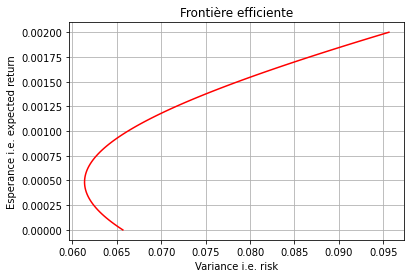

In [19]:
Espr_in=np.linspace(0,0.002,100)
W_in=[Calculus(Sin,mu_in,d) for d in Espr_in] ## on utilise calculus qui determine les poids des assets dans le portfeuille pour la frontière efficiente pour une esperance donnée --> np.linspace... et on utilise le calcul risk sqrt(252 * w* Cov * w)
Var_in=[Calcul_risk(Sin,W_in[i]) for i in range(len(W_in))]
plt.figure()
plt.plot(Var_in,Espr_in,c='r')
plt.title("Frontière efficiente")
plt.xlabel("Variance i.e. risk")
plt.ylabel("Esperance i.e. expected return")
plt.grid()

plt.show()

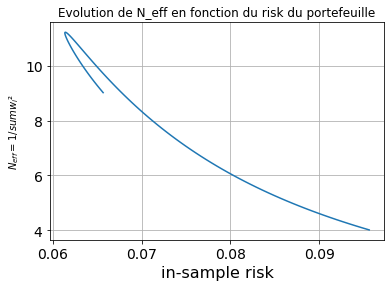

In [56]:
list_n_eff=[Port_Metric(w) for w in W_in]
plt.plot(Var_in,list_n_eff)
plt.tick_params(labelsize=14)
plt.title("Evolution de N_eff en fonction du risk du portefeuille")
plt.xlabel('in-sample risk',fontsize=16)
plt.ylabel("$N_{eff}=1/sum{w_{i}²}$")
plt.grid()
plt.show()
## plus on prends de risque plus il y a un petit nombre d'assets qui sont responsable de tout 

# Mesure des supposés portfolios sur les cours si on avait pris la position à t=2000 

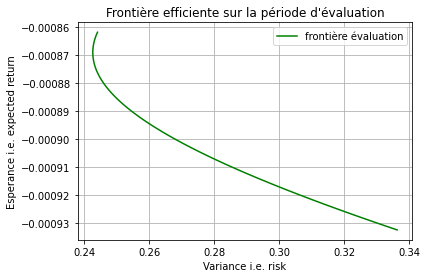

In [20]:
## on prend les poids qu'on a determiné avec le passé --> construction des portfolios efficients à partir des données passées --> fenêtre sur 2k jours
# On calcul la variance de ces portfolio avec ses poids mais en prenant les matrices de covariance et moyenne basées sur les cours d'évaluation t à t+252 

Var_out=[Calcul_risk(Sout,W_in[i]) for i in range(len(W_in))]
Espr_out=[Calcul_esp(W_in[i],mu_out)  for i in range(len(W_in))]

plt.figure()
plt.plot(Var_out,Espr_out,c='green',label="frontière évaluation")
plt.title("Frontière efficiente sur la période d'évaluation")
plt.xlabel("Variance i.e. risk")
plt.ylabel("Esperance i.e. expected return")
plt.legend()
plt.grid()
plt.show()
## on se rend compte que dans les présumés portfolios efficients n'offrent pas de performances acceptables sur la période d'évaluation

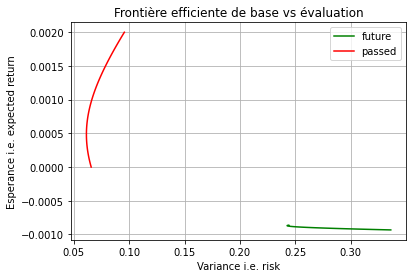

In [21]:
plt.figure()
plt.plot(Var_out,Espr_out,c='green',label="future")
plt.plot(Var_in,Espr_in,c='red',label="passed")
plt.title("Frontière efficiente de base vs évaluation")
plt.xlabel("Variance i.e. risk")
plt.ylabel("Esperance i.e. expected return")
plt.legend()
plt.grid()
plt.show()
### idéal :  avoir rouge et vert superposés -->

No handles with labels found to put in legend.


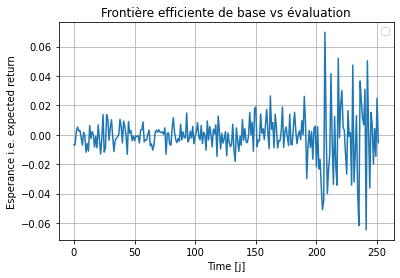

mean : -0.000861879584606437
std :  0.24404957790280024
-0.0008618795846064372 0.2440495779028001


In [22]:
## L'évolution du portfolio 0 au cours du temps
plt.figure()
plt.plot((ret_out * W_in[0][np.newaxis].T).sum(axis=0))
plt.title("Frontière efficiente de base vs évaluation")
plt.xlabel("Time [j]")
plt.ylabel("Esperance i.e. expected return")
plt.legend()
plt.grid()
plt.show()


print("mean :" ,(ret_out * W_in[0][np.newaxis].T).sum(axis=0).mean())
print("std : ", (np.sqrt(252)*ret_out * W_in[0][np.newaxis].T).sum(axis=0).std())

print(Espr_out[0],Var_out[0])


# étude de l'impact de la période de fenêtrage 

In [23]:
Gross_list,Sharpe_list,Port_list=[],[],[]

### à la base on a 2000 val pour la période IN, on va faire varier la fenêtre d'étude de 10 à 2000 avec un pas de 10 
for t in range(10,2000,10): 

    ##################################
    ########### SLICING ##############
    ##################################

    ret_in_short=ret_in[:,:t] ## attention les lignes sont les colonnes #transposée i.e. colonne= prix à un temps ti et ligne assets


    ##################################
    ######### MEAN & STD  ############
    ##################################
    Sin = np.cov(ret_in_short,bias=True)## recalcule la covariance et la moyenne
    mu_in = ret_in_short.mean(axis=1)

    ##################################
    ########### WEIGHT ###############
    ##################################
    # w=Calculus(Sin,mu_in,0.01) #WORKS BUT  is arbitrary 
    w=Min_Var_PTF(Sin)## return the w which create pf with min VAR 

    ##################################
    ######## VALEURS INTERETS ########
    ##################################
    Gross_list.append(Gross_Levarage(w))
    #Sharpe_list.append(Sharpe_Ration(mu_in,Sin,length=t))
    Port_list.append(Port_Metric(w))

No handles with labels found to put in legend.


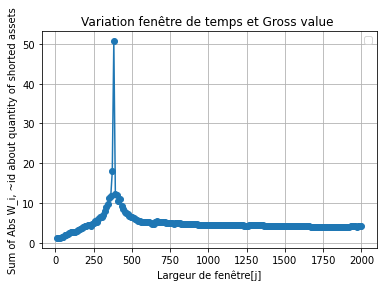

In [24]:
plt.plot(np.linspace(10,2000,199),Gross_list,"-o")
plt.title("Variation fenêtre de temps et Gross value ")
plt.xlabel("Largeur de fenêtre[j]")
plt.ylabel("Sum of Abs W_i, ~id about quantity of shorted assets")
plt.legend()
plt.grid()
plt.show()
## on voit que plus on regarde sur le long terme moins on fait de short trading. 

In [25]:
# plt.plot(np.linspace(10,2000,199),Sharpe_list)
## celui qui a le sharpe ratio le plus gaut est le meilleur 
# practice, the Sharpe ratio ex post is used : the comparison of the ratios allows to classify : the higher the ratio, the better the performance of the fund isassumed.

No handles with labels found to put in legend.


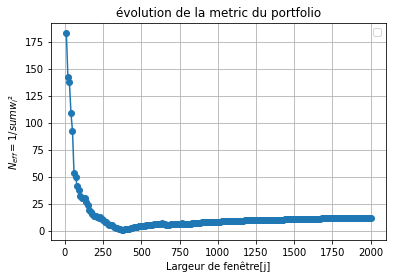

In [42]:
## plus on regarde sur le long terme plus il y a d'individualité (#assets) dans l'équipe (# portefolio)
plt.plot(np.linspace(10,2000,199),Port_list,"-o")
plt.title("évolution de la metric du portfolio")
plt.xlabel("Largeur de fenêtre[j]")
plt.ylabel("$N_{eff}=1/sum{w_{i}²}$")
plt.legend()
plt.grid()
plt.show()

## Long only --> No short trading

In [28]:
from cvxopt import matrix, solvers
solvers.options['show_progress'] = False

In [29]:
def EV_PTF_positive(R,mu,m):
    """
Entries : R --> covariance matrix 
        mu --> mean 
        m --> desired return exepcted return 
    """

    N = R.shape[0]
    
    #Aw = b
    A = np.ones((2,N))
    A[1] = mu
    
    b = matrix(np.array([1.,m]))
    
    #G w < h
    G = -np.identity(N)
    h = matrix(np.zeros(N))


    A = matrix(A)
    G = matrix(G)
    
    # min w P w
    P = matrix(R)
    
    # min w q
    q = matrix(np.zeros(N))


    r = solvers.qp(P,q,A=A,b=b,G=G,h=h)
    
    return np.array(r['x']).T[0]

In [30]:
Sin = np.cov(ret_in,bias=True)
Sout = np.cov(ret_out,bias=True)

mu_in = ret_in.mean(axis=1)
mu_out = ret_out.mean(axis=1)

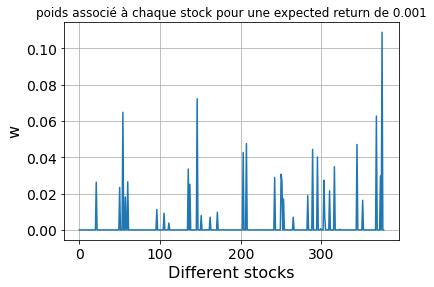

In [57]:
w = EV_PTF_positive(Sin,mu_in,0.001)
plt.plot(w)
plt.xlabel('Different stocks',fontsize=16)
plt.ylabel('w',fontsize=16)
plt.title("poids associé à chaque stock pour une expected return de 0.001")
plt.tick_params(labelsize=14)
plt.grid()

In [36]:
Expe_r_positive=np.linspace(0, 0.001,100)
W = np.array([EV_PTF_positive(Sin,mu_in,m) for m in Expe_r_positive]) ## on calcul les poids positifs pour des gains entre 0 et 0.001 

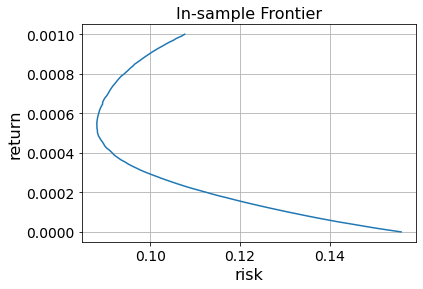

In [58]:
Risk=[Calcul_risk(Sin,w) for w in W]
plt.plot(Risk,Expe_r_positive)
plt.title('In-sample Frontier',fontsize=16)
plt.tick_params(labelsize=14)
plt.xlabel('risk',fontsize=16)
plt.ylabel('return',fontsize=16)
plt.grid()

In [1]:
plt.plot(Expe_r_positive,1/(W**2).sum(axis=1))
plt.tick_params(labelsize=14)
plt.xlabel('in-sample risk',fontsize=16)
plt.ylabel(r'$N_{eff}$',fontsize=16)
txt="on voit alors qu'on se déversifie car N_eff augmente"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.grid()
plt.show()

NameError: name 'plt' is not defined